## The BFI

The Big Five Inventory (a.k.a. the BFI) is one of the most widely utitlized tests in the field of personality research. The test measures the extent to which your personality adheres to 5 domains: Intellect/Imagination `(O)`, Conscientiousness `(C)`, Extraversion `(E)`, Agreeableness `(A)`, Emotional Stability `(N)`. Take a look at these score distributions from an international sample of 19,719 test-takers:

In [7]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

big5_df = pd.read_csv('../../06b_DOW2_and_Asking_Questions/data/openpsych_data.csv', sep='\t')

questions = '''
E1	I am the life of the party.
E2	I don't talk a lot.
E3	I feel comfortable around people.
E4	I keep in the background.
E5	I start conversations.
E6	I have little to say.
E7	I talk to a lot of different people at parties.
E8	I don't like to draw attention to myself.
E9	I don't mind being the center of attention.
E10	I am quiet around strangers.
N1	I get stressed out easily.
N2	I am relaxed most of the time.
N3	I worry about things.
N4	I seldom feel blue.
N5	I am easily disturbed.
N6	I get upset easily.
N7	I change my mood a lot.
N8	I have frequent mood swings.
N9	I get irritated easily.
N10	I often feel blue.
A1	I feel little concern for others.
A2	I am interested in people.
A3	I insult people.
A4	I sympathize with others' feelings.
A5	I am not interested in other people's problems.
A6	I have a soft heart.
A7	I am not really interested in others.
A8	I take time out for others.
A9	I feel others' emotions.
A10	I make people feel at ease.
C1	I am always prepared.
C2	I leave my belongings around.
C3	I pay attention to details.
C4	I make a mess of things.
C5	I get chores done right away.
C6	I often forget to put things back in their proper place.
C7	I like order.
C8	I shirk my duties.
C9	I follow a schedule.
C10	I am exacting in my work.
O1	I have a rich vocabulary.
O2	I have difficulty understanding abstract ideas.
O3	I have a vivid imagination.
O4	I am not interested in abstract ideas.
O5	I have excellent ideas.
O6	I do not have a good imagination.
O7	I am quick to understand things.
O8	I use difficult words.
O9	I spend time reflecting on things.
O10	I am full of ideas.
'''

big5_questions_df = pd.DataFrame([item.split('\t') for item in questions.splitlines() if item>''])

factor_map = { 1: 'E', 
               2: 'A',
               3: 'C',
               4: 'N',
               5: 'O' }

ipip_df = pd.read_html('../../06b_DOW2_and_Asking_Questions/big5_questions.html', header=0)[0]
ipip_df = ipip_df.rename(columns={'Unnamed: 1': 'text', 'Unnamed: 7': 'factor_and_direction'})[['text','factor_and_direction']]
ipip_df[['factor','direction']]=ipip_df['factor_and_direction'].str.extract(r'([1-5])(.)')
ipip_df['category']=ipip_df['factor'].astype(int).map(factor_map)

ipip_df = ipip_df.assign(number=np.repeat(np.arange(1,11),5))
ipip_df = ipip_df.assign(qcode=ipip_df['category'].str.cat(ipip_df['number'].astype(str)))  

neg_items = ipip_df.query('direction=="-"')['qcode']

big5_scored_df = big5_df.copy()
big5_scored_df[neg_items] = 6-big5_df[neg_items]

cat_cols = {
    cat : [f'{cat}{n+1}' for n in range(10)] 
    for cat in ('O','C','E','A','N') 
}

for cat, cols in cat_cols.items():
    big5_scored_df[cat]=big5_scored_df[cols].sum(axis=1)

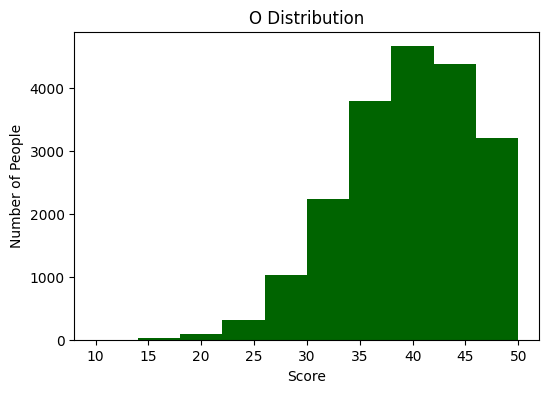

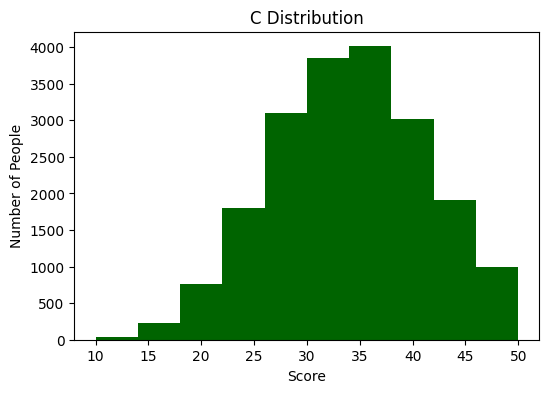

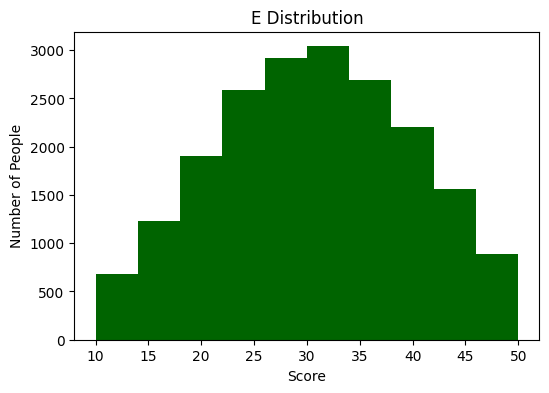

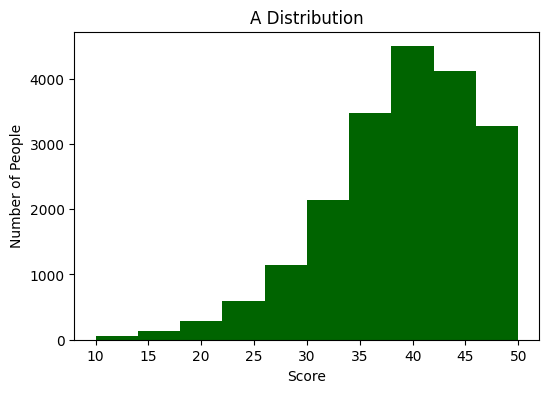

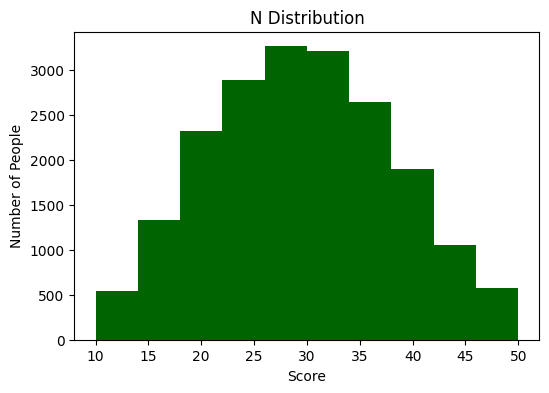

In [8]:
traits = ['O', 'C', 'E', 'A', 'N']

%matplotlib inline

for trait in traits:
    col = f"{trait}"
    plt.figure(figsize=(6,4))
    plt.hist(big5_scored_df[col], bins=10, color="darkgreen")
    plt.title(f"{trait} Distribution")
    plt.xlabel("Score")
    plt.ylabel("Number of People")
    plt.show()

The distribution of scores varies from trait to trait. The scores seem to be distributed normally for the Extraversion and Negative Emotionality domains, while the Conscientiousness distribution is slightly skewed left, and the Intellect/Imagination and Agreeableness domains are more strongly skewed left. The online version of the test on [Open Psychometrics](https://openpsychometrics.org/tests/IPIP-BFFM/) gives the user their percentile ranks for each domain as opposed to their raw scores to account for this variety.

## COMM 3180 Score Breakdown

The 19 members of University of Pennsylvania course COMM 3180 took the Open Psychometrics version of the BFI. I was interested to see how the percentile ranks of the students compared to those of the larger international sample. First, I wanted to plot the distribution of the student's scores.

In [9]:
class_big5_df = pd.read_csv('../../06b_DOW2_and_Asking_Questions/data/class_big5_data.csv')

roman_to_trait = {
    "I": "E",
    "II": "N",
    "III": "A",
    "IV": "C",
    "V": "O"
}
class_big5_df = class_big5_df.rename(columns=roman_to_trait)

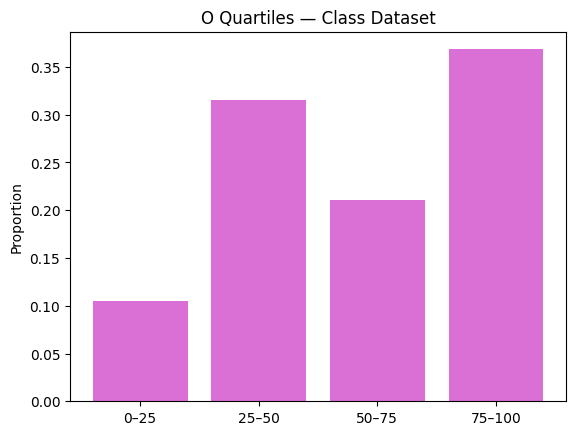

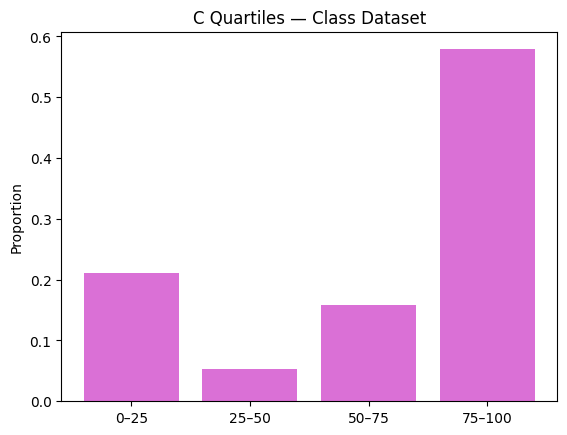

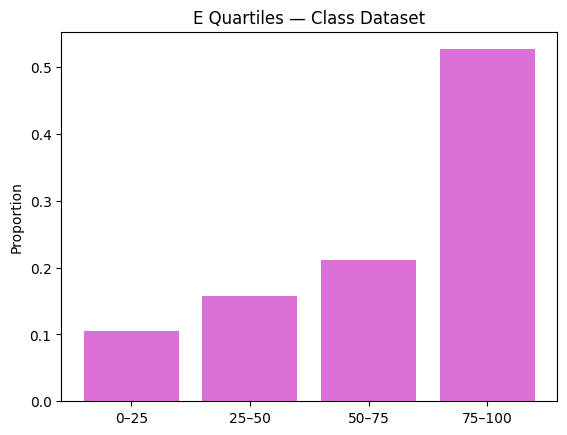

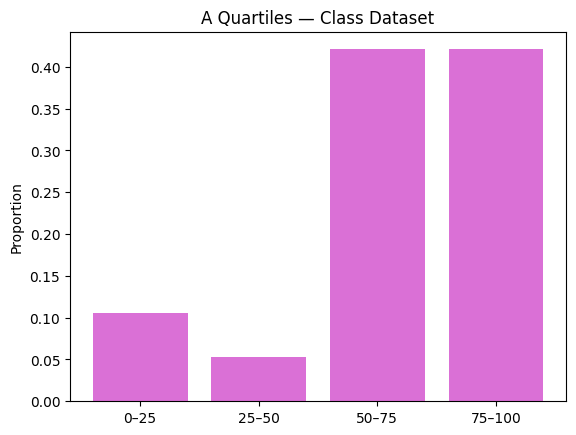

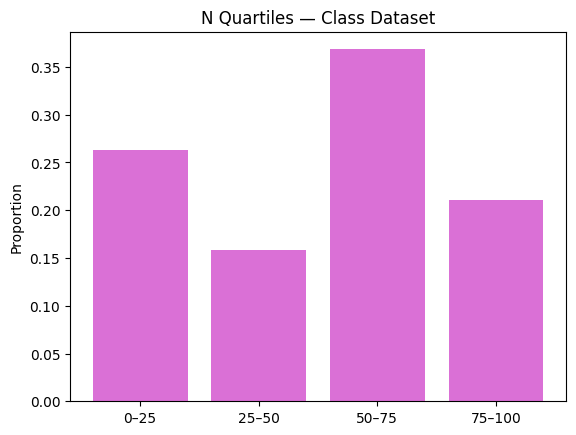

In [10]:
bins = [0, 25, 50, 75, 100]
labels = ["0–25", "25–50", "50–75", "75–100"]
traits = ["O", "C", "E", "A", "N"]

for col in traits:
    percentile_rank_col = f'{col}_Percentile_Rank'
    big5_scored_df[percentile_rank_col] = (
        big5_scored_df[col].rank(pct=True) * 100
    ).round(0)

for trait in traits:
    big_col = f"{trait}_Percentile_Rank"
    class_col = trait

    big5_scored_df[f"{trait}_bin"] = pd.cut(
        big5_scored_df[big_col], bins=bins, labels=labels
    )
    class_big5_df[f"{trait}_bin"] = pd.cut(
        class_big5_df[class_col], bins=bins, labels=labels
    )
    class_dist = class_big5_df[f"{trait}_bin"].value_counts(normalize=True).sort_index()
    
    plt.figure()
    plt.bar(class_dist.index, class_dist.values, color="orchid")
    plt.title(f"{trait} Quartiles — Class Dataset")
    plt.ylabel("Proportion")
    plt.show()

As indicated by the above graphs, the students in COMM 3180 are quite extraverted and conscientious. Over half of the students scored within the top quartile of Extraversion and Conscientiousness. Additionally, 80% of students scored within the top two quartiles of Agreeableness scores. Intellect and Imagination scores leaned toward the high end, and Emotional Stability scores were the most evenly distributed.

This breakdown speaks to the personalities of Penn students. The high scores for Conscientiousness and Extraversion speaks to Penn's reputation as the "social ivy," while widely distributed Emotion Stability scores suggest a broad range of emotional experiences among students. Overall, these patterns reflect a student body that is highly driven and socially engaged, but varied in how individuals respond to stress and emotional challenges.

## Comparison to Other College-Aged Individuals

I wanted to see if these differences could be attributed to the age of college students. To make this comparison, I created a table that compares the score quartile breakdowns of the Penn student sample and individuales ages 17-22 in the international sample.

In [11]:
young_big5_df = big5_scored_df.copy()
young_big5_df_filtered = young_big5_df[(
    (young_big5_df['age'] >= 17) &
    (young_big5_df['age'] <= 22)
)].copy()

for trait in traits:
    young_big5_df_filtered[f"{trait}_Percentile_Rank"] = (
    young_big5_df_filtered[trait].rank(pct=True) * 100
)
    big_col = f"{trait}_Percentile_Rank"
    class_col = trait

    young_big5_df_filtered[f"{trait}_bin"] = pd.cut(
        young_big5_df_filtered[big_col], bins=bins, labels=labels
    )

    class_big5_df[f"{trait}_bin"] = pd.cut(
        class_big5_df[class_col], bins=bins, labels=labels
    )

    young_dist = young_big5_df_filtered[f"{trait}_bin"].value_counts(normalize=True).sort_index() * 100
    class_dist = class_big5_df[f"{trait}_bin"].value_counts(normalize=True).sort_index() * 100

    comparison2 = pd.DataFrame({
        "Public Dataset, ages 17–22 (%)": young_dist,
        "Class Dataset (%)": class_dist
    }).round(1)

    display(comparison2)

,"Public Dataset, ages 17–22 (%)",Class Dataset (%)
O_bin,,
0–25,25.8,10.5
25–50,22.3,31.6
50–75,28.1,21.1
75–100,23.9,36.8


,"Public Dataset, ages 17–22 (%)",Class Dataset (%)
C_bin,,
0–25,24.3,21.1
25–50,25.0,5.3
50–75,25.7,15.8
75–100,25.0,57.9


,"Public Dataset, ages 17–22 (%)",Class Dataset (%)
E_bin,,
0–25,23.9,10.5
25–50,25.8,15.8
50–75,26.1,21.1
75–100,24.2,52.6


,"Public Dataset, ages 17–22 (%)",Class Dataset (%)
A_bin,,
0–25,24.3,10.5
25–50,24.3,5.3
50–75,27.8,42.1
75–100,23.6,42.1


,"Public Dataset, ages 17–22 (%)",Class Dataset (%)
N_bin,,
0–25,26.3,26.3
25–50,26.0,15.8
50–75,23.8,36.8
75–100,24.0,21.1


The quartile breakdowns show that COMM 3180 students differ noticeably from the international sample of individuals aged 17–22. Penn students are much more concentrated in the highest quartile for several traits, especially Conscientiousness and Extraversion. For example, nearly 58% of the class scores in the top quartile of Conscientiousness, compared to about 25% in the public dataset. Similarly, over half of Penn students fall in the top Extraversion quartile.

Agreeableness scores also skew higher in the class sample, with most students scoring in the upper two quartiles. Openness shows a mixed but still slightly higher distribution among Penn students. In contrast, Negative Emotionality is the most similar between groups, with comparable proportions across quartiles.

## Conclusion

Overall, this comparison indicates that the personality differences observed in the COMM 3180 sample cannot be explained solely by age, since the Penn students differ substantially from other 17–22-year-olds in the international dataset. Instead, these results likely reflect characteristics of Penn’s student population specifically, including a tendency toward higher conscientiousness, sociability, and interpersonal cooperation. Age may play a role in personality development, but institutional environment appears to be a stronger contributor to the patterns seen here.